In [5]:
# %pip install spacy
# %python -m spacy download en_core_web_sm
# %python -m spacy download en
# %pip install en_core_web_sm-3.1.0-py3-none-any.whl

Note: you may need to restart the kernel to use updated packages.


UsageError: Line magic function `%python` not found (But cell magic `%%python` exists, did you mean that instead?).


In [6]:


# !pip install beautifulsoup4
# %pip install textblob
# !pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to c:\users\pares\appdata\local\temp\pip-req-build-ss924pnd
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 96bf02872d9756f29d6cddb8aafaedcd2a39bbb4
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=7676 sha256=20e8bc4aaf2cf37b0dce5e2c152bde976f17b91ab772b55bee20e817189e1da8
  Stored in directory: C:\Users\pares\AppData\Local\Temp\pip-ephem-wheel-cache-wy8oej2x\wheels\d1\c3\bb\559fe93e652b51cbc532f17e9693f3b70055f8560cf06c1fb3
Successfully built preprocess-kgptalkie
  Attempting uninstall: preprocess-kgptalkie
    Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git 'C:\Users\pares\AppData\Local\Temp\pip-req-build-ss924pnd'
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [7]:
import re
import os
import sys
import json

import pandas as pd
import numpy as np
import spacy
import textblob
from spacy.lang.en.stop_words import STOP_WORDS as stopwords
from bs4 import BeautifulSoup
import unicodedata
from textblob import TextBlob
import en_core_web_sm

In [8]:
import warnings 

In [9]:
warnings.filterwarnings('ignore')
import pandas as pd

In [10]:
df = pd.read_csv('twitter_sentiment.csv',header =None,index_col=0)

In [11]:
df.head()

,1,2,3
0,,,
2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2401,Borderlands,Positive,im coming on borderlands and i will murder you...
2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [12]:
df = df[[2,3]].reset_index(drop = True)

 

In [13]:
df.columns = ['sentiment', 'text']
df.head()

,sentiment,text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [15]:
df.info()

df.isnull().sum()

df.dropna(inplace=True)
print(df.shape)

df = df[df['text'].apply(len)>5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75682 entries, 0 to 75681
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  75682 non-null  object
 1   text       74996 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB
(74996, 2)


In [16]:
print(df.shape)

(72883, 2)


In [17]:
df['text'].apply(len)

0         53
1         51
2         50
3         51
4         57
        ... 
75677    281
75678    248
75679    120
75680     49
75681    116
Name: text, Length: 72883, dtype: int64

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
nlp = en_core_web_sm.load()



In [20]:
 def _get_wordcounts(x):
	length = len(str(x).split())
	return length

def _get_charcounts(x):
	s = x.split()
	x = ''.join(s)
	return len(x)

def _get_avg_wordlength(x):
	count = _get_charcounts(x)/_get_wordcounts(x)
	return count

def _get_stopwords_counts(x):
	l = len([t for t in x.split() if t in stopwords])
	return l

In [21]:
def _get_hashtag_counts(x):
	l = len([t for t in x.split() if t.startswith('#')])
	return l

def _get_mentions_counts(x):
	l = len([t for t in x.split() if t.startswith('@')])
	return l

def _get_digit_counts(x):
	digits = re.findall(r'[0-9,.]+', x)
	return len(digits)

def _get_uppercase_counts(x):
	return len([t for t in x.split() if t.isupper()])

def _cont_exp(x):
	abbreviations = json.load(open(abbreviations_path))

	if type(x) is str:
		for key in abbreviations:
			value = abbreviations[key]
			raw_text = r'\b' + key + r'\b'
			x = re.sub(raw_text, value, x)
			# print(raw_text,value, x)
		return x
	else:
		return x

In [22]:
def _get_emails(x):
	emails = re.findall(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+\b)', x)
	counts = len(emails)

	return counts, emails


def _remove_emails(x):
	return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)',"", x)

def _get_urls(x):
	urls = re.findall(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', x)
	counts = len(urls)

	return counts, urls

def _remove_urls(x):
	return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '' , x)

def _remove_rt(x):
	return re.sub(r'\brt\b', '', x).strip()

def _remove_special_chars(x):
	x = re.sub(r'[^\w ]+', "", x)
	x = ' '.join(x.split())
	return x

def _remove_html_tags(x):
    
	return BeautifulSoup(x, 'lxml').get_text().strip()

def _remove_accented_chars(x):
	x = unicodedata.normalize('NFKD', x).encode('ascii', 'ignore').decode('utf-8', 'ignore')
	return x

def _remove_stopwords(x):
	return ' '.join([t for t in x.split() if t not in stopwords])	

In [23]:
def _make_base(x):
	x = str(x)
	x_list = []
	doc = nlp(x)
	
	for token in doc:
		lemma = token.lemma_
		if lemma == '-PRON-' or lemma == 'be':
			lemma = token.text

		x_list.append(lemma)
	return ' '.join(x_list)

In [24]:
def _get_value_counts(df, col):
	text = ' '.join(df[col])
	text = text.split()
	freq = pd.Series(text).value_counts()
	return freq


In [25]:
def _remove_common_words(x, freq, n=20):
	fn = freq[:n]
	x = ' '.join([t for t in x.split() if t not in fn])
	return x


In [26]:
def _remove_rarewords(x, freq, n=20):
	fn = freq.tail(n)
	x = ' '.join([t for t in x.split() if t not in fn])
	return x

def _remove_dups_char(x):
	x = re.sub("(.)\\1{2,}", "\\1", x)
	return x

def _spelling_correction(x):
	x = TextBlob(x).correct()
	return x


In [27]:
def _get_basic_features(df):
	if type(df) == pd.core.frame.DataFrame:
		df['char_counts'] = df['text'].apply(lambda x: _get_charcounts(x))
		df['word_counts'] = df['text'].apply(lambda x: _get_wordcounts(x))
		df['avg_wordlength'] = df['text'].apply(lambda x: _get_avg_wordlength(x))
		df['stopwords_counts'] = df['text'].apply(lambda x: _get_stopwords_counts(x))
		df['hashtag_counts'] = df['text'].apply(lambda x: _get_hashtag_counts(x))
		df['mentions_counts'] = df['text'].apply(lambda x: _get_mentions_counts(x))
		df['digits_counts'] = df['text'].apply(lambda x: _get_digit_counts(x))
		df['uppercase_counts'] = df['text'].apply(lambda x: _get_uppercase_counts(x))
	else:
		print('ERROR: This function takes only Pandas DataFrame')
		
	return df

In [28]:
def _get_ngram(df, col, ngram_range):
	vectorizer = CountVectorizer(ngram_range=(ngram_range, ngram_range))
	vectorizer.fit_transform(df[col])
	ngram = vectorizer.vocabulary_
	ngram = sorted(ngram.items(), key = lambda x: x[1], reverse=True)

	return ngram

In [29]:
df= _get_basic_features(df)
df.head()

,sentiment,text,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,Positive,im getting on borderlands and i will murder yo...,43,11,3.909091,6,0,0,1,0
1,Positive,I am coming to the borders and I will kill you...,40,12,3.333333,6,0,0,1,2
2,Positive,im getting on borderlands and i will kill you ...,41,10,4.100000,5,0,0,1,0
3,Positive,im coming on borderlands and i will murder you...,42,10,4.200000,5,0,0,1,0
4,Positive,im getting on borderlands 2 and i will murder ...,46,12,3.833333,6,0,0,2,0


In [30]:
df.columns

Index(['sentiment', 'text', 'char_counts', 'word_counts', 'avg_wordlength',
       'stopwords_counts', 'hashtag_counts', 'mentions_counts',
       'digits_counts', 'uppercase_counts'],
      dtype='object')

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

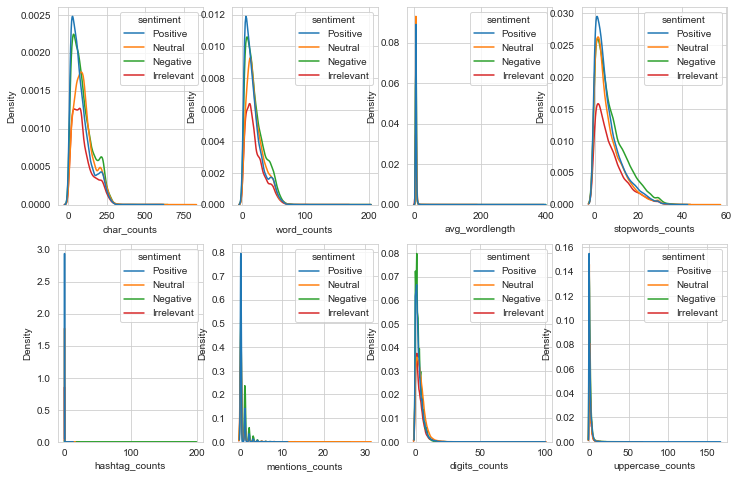

In [32]:
plt.figure(figsize=(12,8))
num_cols = df.select_dtypes(include='number').columns
# print (num_cols)

for index, cols in enumerate(num_cols):
    plt.subplot(2,4,index+1)
    sns.kdeplot(data=df,x=cols, hue = 'sentiment',fill=False)
plt.tight_layout
plt.show()
    

<AxesSubplot:ylabel='sentiment'>

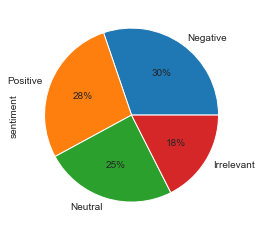

In [33]:
df['sentiment'].value_counts().plot(kind ='pie',autopct ='%1.0f%%')

In [34]:
#wordcloud visualisation
# %pip install wordcloud

In [38]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

stopwords = set(STOPWORDS)

In [39]:
print(stopwords)

{'both', "here's", 'however', "they'd", 'who', "weren't", "it's", 'here', 'those', 'am', 'been', 'was', 'else', 'themselves', 'more', "you'll", "we're", 'ourselves', 'through', 'we', "what's", 'below', 'under', 'as', 'you', 'your', "we'll", 'can', 'its', 'their', 'any', "they've", 'also', "mustn't", 'until', "don't", "i'm", "they'll", 'whom', 'herself', "that's", 'at', 'if', "aren't", 'where', 'same', "when's", 'than', "hadn't", 'then', 'from', "hasn't", 'this', 'no', 'most', 'into', 'myself', 'me', 'own', 'when', "haven't", "i'd", 'they', 'i', 'and', 'are', 'have', 'himself', 'not', 'theirs', 'each', 'hers', 'his', 'therefore', 'by', 'again', 'yourselves', "can't", 'with', 'ever', 'otherwise', 'off', 'ought', 'what', 'an', "didn't", "who's", 'yours', 'my', 'the', 'during', 'could', 'some', "shouldn't", "how's", "i've", 'http', "where's", 'he', "i'll", 'did', "he'll", 'having', 'all', 'ours', 'to', 'r', "there's", 'for', 'our', 'against', 'up', 'him', 'in', "won't", "you're", 'like', "

In [40]:
 
# print(str(type(df['sentiment'])))
# data = " ".join(text for text in df.text)
# wordcloud = WordCloud().generate("Paresh")
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

wc = WordCloud(background_color="white", width=800, height=400)
wc.generate("foo bar foo bar hello world")
plt.axis("off")
plt.imshow(wc)
 
plt.show()

ValueError: Only supported for TrueType fonts

In [ ]:
# Data Cleaning
# lowercase, remove url, html, punctuations, retweet

df['text'] = df['text'].apply(lambda x: x.lower())
df['text'] = df['text'].apply(lambda x: _remove_urls(x))


In [ ]:

df['text'] = df['text'].apply(lambda x: _remove_special_chars(x))
df['text'] = df['text'].apply(lambda x: _remove_rt(x))

In [ ]:
 
%pip install lxml

In [ ]:
df['text'] = df['text'].apply(lambda x: _remove_html_tags(x))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'],df['sentiment'],test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline




In [ ]:
clf = Pipeline([('tfid',TfidfVectorizer() ), ('rfc',RandomForestClassifier(n_jobs=-1))])
clf.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report 


In [ ]:
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))

In [ ]:
import pickle
pickle.dump(clf,open("twitter_sentiment.pkl", 'wb'))

In [ ]:
clf.predict['How the hell']